##🏁 Project Introduction

This project aims to predict the outcomes of English Premier League (EPL) matches — Home Win, Draw, or Away Win — using machine learning techniques. The dataset includes historical match data from 2000 to 2024 and covers various features such as goals, fouls, cards, shots, and more.


**The workflow includes:**

-Data Preprocessing: Cleaning, transforming, and exploring the dataset.

-Exploratory Data Analysis (EDA): Visualizing feature relationships and class distributions.

-Model Training: Applying and evaluating several classification models.

-Model Selection: Choosing the best-performing model (XGBoost).

-Model Saving: Persisting the model for later use.

-Deployment Prep: Loading and using the saved model for predictions.

##📊 About Dataset
**Containing EPL data from 2000 to 2024**

• Date: The date that the match took place

• HomeTeam: The team playing at home

• AwayTeam: The team playing away

• FTHG: The goals scored by the home team at full time

• FTAG: The goals scored by the away team at full time

• FTR: Full time result (This is what you are predicting)

• HTHG: The goals scored by the home team at half time

• HTAG: The goals scored by the away team at half time

• HTR: The result at half time

• Referee: The name of the referee officiating the match

• HS: Total number of shots on goal by the home team

• AS: Total number of shots on goal by the away team

• HST: Total number of shots on target by the home team

• AST: Total number of shots on target by the away team

• HF: Total number of fouls committed by the home team

• AF: Total number of fouls committed by the away team

• HC: Total number of corners by the home team

• AC: Total number of corners by the away team

• HY: Total number of yellow cards received by the home team

• AY: Total number of yellow cards received by the away team

• HR: Total number of red cards received by the home team

• AR: Total number of red cards received by the away team

Importing all necessary libraries for data handling, visualization, preprocessing, model building, evaluation, and saving/loading models.

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from sklearn.svm import SVC
import os
import joblib

Defining a function to read the dataset from a CSV file into a DataFrame.

In [55]:
def read_data(path):
    df = pd.read_csv(path)
    return df

In [56]:
read_data(path='/content/epl-training.csv')

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,...,HST,AST,HC,AC,HF,AF,HY,AY,HR,AR
0,19/08/2000,Charlton,Man City,4.0,0.0,H,2.0,0.0,H,Rob Harris,...,14.0,4.0,6.0,6.0,13.0,12.0,1.0,2.0,0.0,0.0
1,19/08/2000,Chelsea,West Ham,4.0,2.0,H,1.0,0.0,H,Graham Barber,...,10.0,5.0,7.0,7.0,19.0,14.0,1.0,2.0,0.0,0.0
2,19/08/2000,Coventry,Middlesbrough,1.0,3.0,A,1.0,1.0,D,Barry Knight,...,3.0,9.0,8.0,4.0,15.0,21.0,5.0,3.0,1.0,0.0
3,19/08/2000,Derby,Southampton,2.0,2.0,D,1.0,2.0,A,Andy D'Urso,...,4.0,6.0,5.0,8.0,11.0,13.0,1.0,1.0,0.0,0.0
4,19/08/2000,Leeds,Everton,2.0,0.0,H,2.0,0.0,H,Dermot Gallagher,...,8.0,6.0,6.0,4.0,21.0,20.0,1.0,3.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9216,19/05/2024,Crystal Palace,Aston Villa,5.0,0.0,H,2.0,0.0,H,D Bond,...,9.0,2.0,10.0,8.0,2.0,4.0,1.0,4.0,0.0,0.0
9217,19/05/2024,Liverpool,Wolves,2.0,0.0,H,2.0,0.0,H,C Kavanagh,...,14.0,3.0,14.0,11.0,10.0,2.0,1.0,1.0,0.0,1.0
9218,19/05/2024,Luton,Fulham,2.0,4.0,A,1.0,2.0,A,M Donohue,...,6.0,7.0,15.0,20.0,4.0,4.0,5.0,4.0,0.0,0.0
9219,19/05/2024,Man City,West Ham,3.0,1.0,H,2.0,1.0,H,J Brooks,...,12.0,2.0,3.0,12.0,11.0,2.0,0.0,1.0,0.0,0.0


**🧹 Creating a preprocessing function that cleans and prepares the data:**

Converts the 'Date' column to datetime format.

Drops the irrelevant 'Referee' column.

Removes a row with missing values.

Encodes match results and team names into numerical format for modeling.

In [57]:
def preprocess_data(df):
    df['Date'] = pd.to_datetime(df['Date'], dayfirst=True, errors='coerce')
    df.drop(columns=['Referee'], inplace=True)
    df.dropna(inplace=True)

    label_map = {'H': 0, 'D': 1, 'A': 2}
    df['FTR'] = df['FTR'].map(label_map)
    df['HTR'] = df['HTR'].map(label_map)

    team_encoder = LabelEncoder()
    df['HomeTeam'] = team_encoder.fit_transform(df['HomeTeam'])
    df['AwayTeam'] = team_encoder.fit_transform(df['AwayTeam'])


    return df

Generate a heatmap to visualize the correlation between numerical features in the dataset, helping to identify strong or weak relationships among variables.

In [58]:
def plot_correlation_heatmap(df):
    plt.figure(figsize=(14, 10))
    corr = df.drop(columns=['Date']).corr(numeric_only=True)
    sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
    plt.title("Feature Correlation Heatmap")
    plt.show()

**This function prepares the data for modeling by:**

Separating features and target (FTR).

Dropping irrelevant or less useful features.

Splitting the data into training and testing sets.

Scaling the features to improve model performance.

In [59]:
def prepare_data(df):
    X = df.drop(columns=['FTR', 'Date','HC','AC','HF','AF'])
    y = df['FTR']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    return X_train, X_test, y_train, y_test

This function trains and evaluates multiple machine learning models. It compares performance using accuracy, confusion matrix, and classification report on both training and testing data. The results help identify the most effective model for predicting EPL match outcomes.

In [60]:
def train_and_evaluate(X_train, X_test, y_train, y_test):
    models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "KNN": KNeighborsClassifier(n_neighbors = 5),
    "Decision Tree": DecisionTreeClassifier(criterion='gini',max_depth=5),
    "Random Forest": RandomForestClassifier(n_estimators=150, criterion='gini',max_depth=7),
    "SVM": SVC(kernel='linear',random_state=42),
    "XGBoost": xgb.XGBClassifier(n_estimators=100,learning_rate=0.1,max_depth=5)
     }

    results = {}
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_predtrain = model.predict(X_train)
        y_predtest = model.predict(X_test)
        acctest = accuracy_score(y_test, y_predtest)
        acctrain = accuracy_score(y_train, y_predtrain)
        results[name] = acctest
        print(f"\n🔹 {name}")
        print(f"Accuracy Train: {acctrain:.4f}")
        print(f"Accuracy Test: {acctest:.4f}")
        print("Confusion Matrix:")
        print(confusion_matrix(y_test, y_predtest))
        print("Classification Report:")
        print(classification_report(y_test, y_predtest))

##💾 Saving the Trained Model
In this step, we save the trained machine learning model using the joblib library. This allows us to reuse the model later without retraining. The model is stored at the specified path.

In [61]:
def save_model(model, path):
    joblib.dump(model, path)
    print(f"Model saved")

##📂 Loading a Saved Model
This function loads a previously saved model from a given path using joblib. It first checks if the file exists to avoid errors. If the file is not found, it raises an appropriate error.

In [62]:
def load_model(path):
    if os.path.exists(path):
        return joblib.load(path)
    else:
        raise FileNotFoundError(f"No model found at {path}")

##🚀 Pipeline Execution and Final Visualization
**Here, we execute the full machine learning pipeline:**

Load and preprocess the Premier League match data.

Visualize the correlation between features to understand relationships.

Split the data into training and testing sets, and scale the features.

Train and evaluate multiple classification models.

Save the best-performing model to a .pkl file for future use.

Finally, we visualize the distribution of match outcomes (Home Win, Draw, Away Win) to better understand class balance in the dataset.



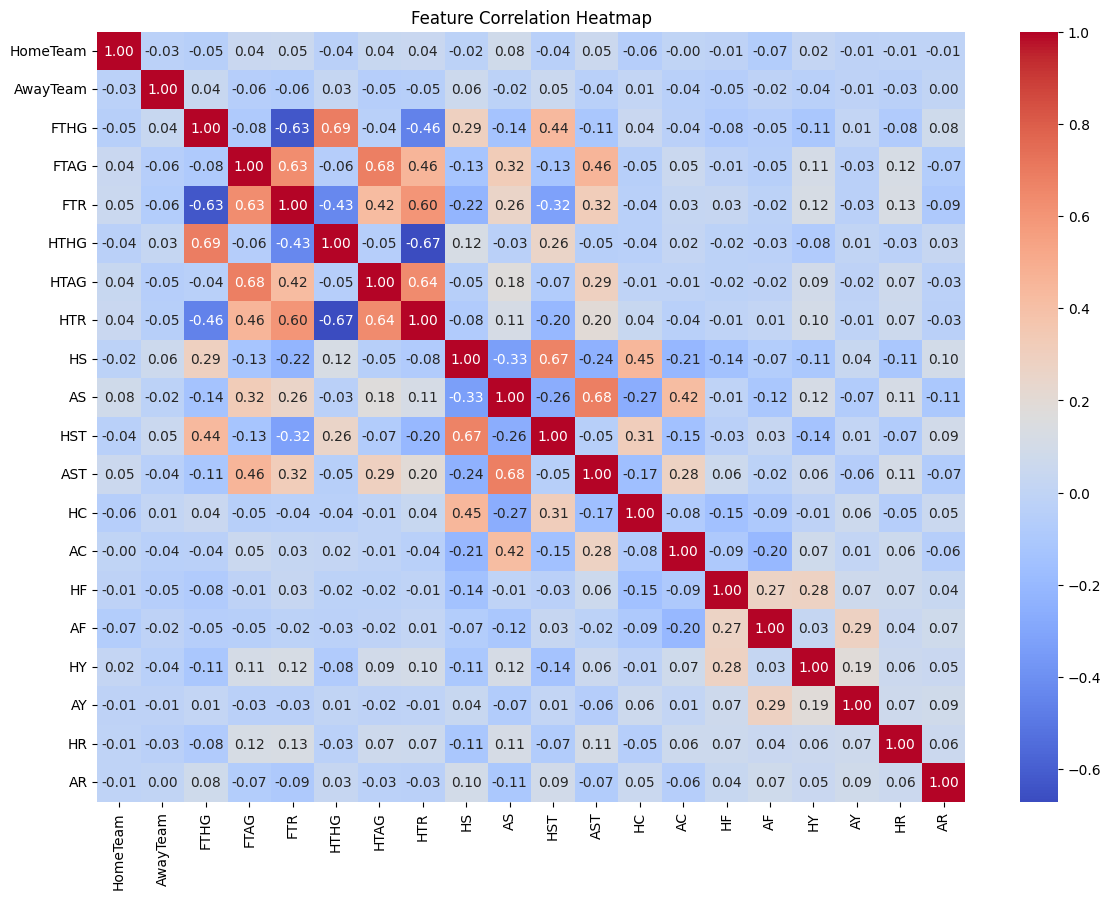


🔹 Logistic Regression
Accuracy Train: 1.0000
Accuracy Test: 1.0000
Confusion Matrix:
[[889   0   0]
 [  0 447   0]
 [  0   0 508]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       889
           1       1.00      1.00      1.00       447
           2       1.00      1.00      1.00       508

    accuracy                           1.00      1844
   macro avg       1.00      1.00      1.00      1844
weighted avg       1.00      1.00      1.00      1844


🔹 KNN
Accuracy Train: 0.8835
Accuracy Test: 0.7896
Confusion Matrix:
[[812  74   3]
 [143 239  65]
 [ 11  92 405]]
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.91      0.88       889
           1       0.59      0.53      0.56       447
           2       0.86      0.80      0.83       508

    accuracy                           0.79      1844
   macro avg       0.76      0.75      0.75      1844

/tmp/ipython-input-2851003817.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='FTR', palette='Set2')


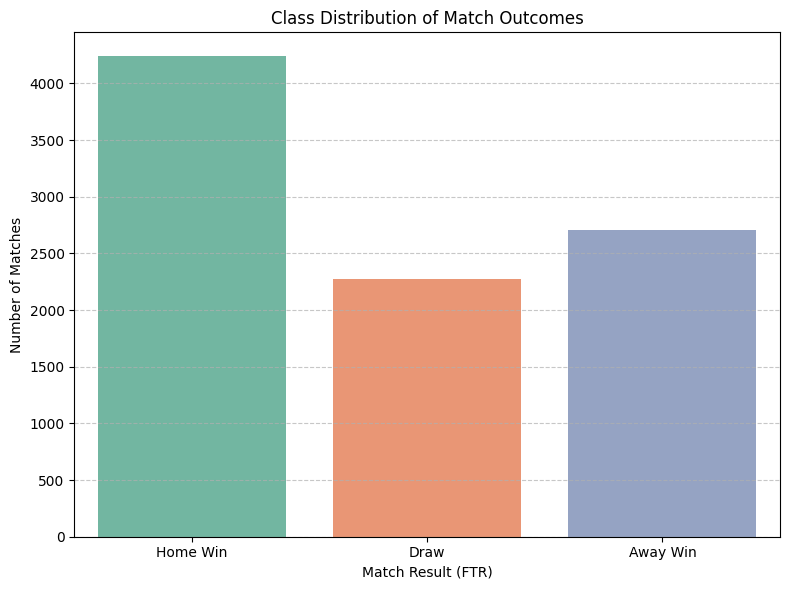

In [63]:
MODEL_PATH = 'EPL_model.pkl'
DATA_PATH = '/content/epl-training.csv'
TEST_SIZE = 0.2
RANDOM_STATE = 42

df = read_data(DATA_PATH)
df = preprocess_data(df)
plot_correlation_heatmap(df)
X_train, X_test, y_train, y_test = prepare_data(df)
model = train_and_evaluate(X_train, X_test, y_train, y_test)
save_model(model, MODEL_PATH)

# Plot the class distribution after data loading and preprocessing
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='FTR', palette='Set2')
plt.title('Class Distribution of Match Outcomes')
plt.xlabel('Match Result (FTR)')
plt.ylabel('Number of Matches')
plt.xticks(ticks=[0, 1, 2], labels=['Home Win', 'Draw', 'Away Win'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()